<a href="https://colab.research.google.com/github/Amrutha294/Engineering-Placements-Prediction/blob/main/Engineering_Placements_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/collegePlace.csv')

In [17]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [18]:
df.tail()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0
2965,23,Male,Civil,0,8,0,0,1


In [19]:
df.shape

(2966, 8)

In [20]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [21]:
df.duplicated().sum()

np.int64(1829)

In [22]:
df.isnull().sum()

,0
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [24]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [25]:
df.nunique()

,0
Age,11
Gender,2
Stream,6
Internships,4
CGPA,5
Hostel,2
HistoryOfBacklogs,2
PlacedOrNot,2


In [26]:
df['Age'].unique()

array([22, 21, 23, 24, 28, 30, 25, 26, 20, 19, 29])

In [27]:
df['Age'].value_counts()

,count
Age,
21,1084
22,941
20,375
23,195
19,156
24,131
26,50
25,29
28,3


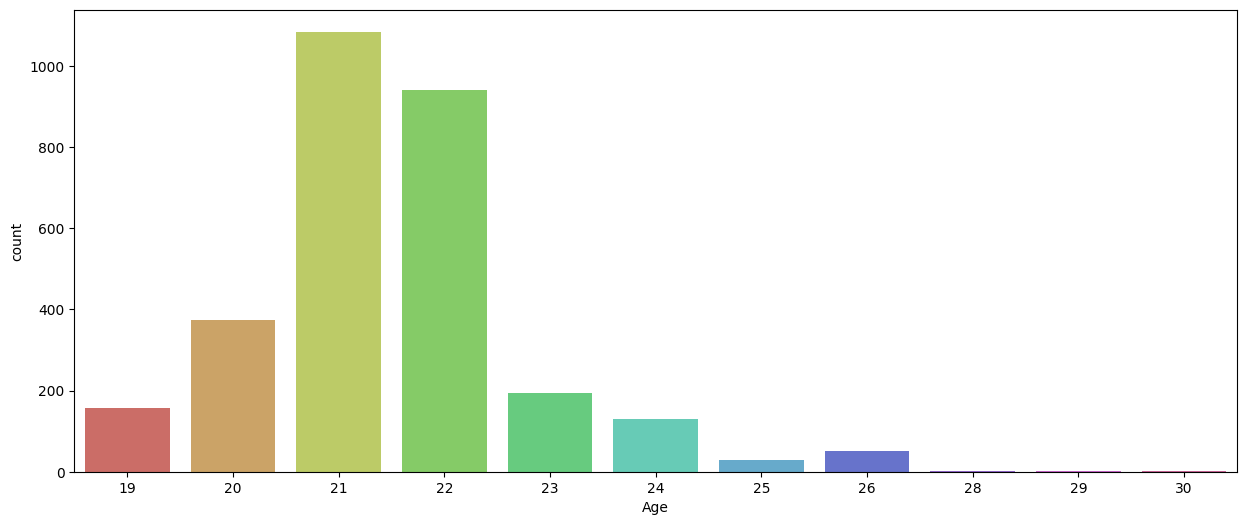

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(x='Age', data=df, palette='hls') # Specify 'x' to avoid ambiguity
plt.show()

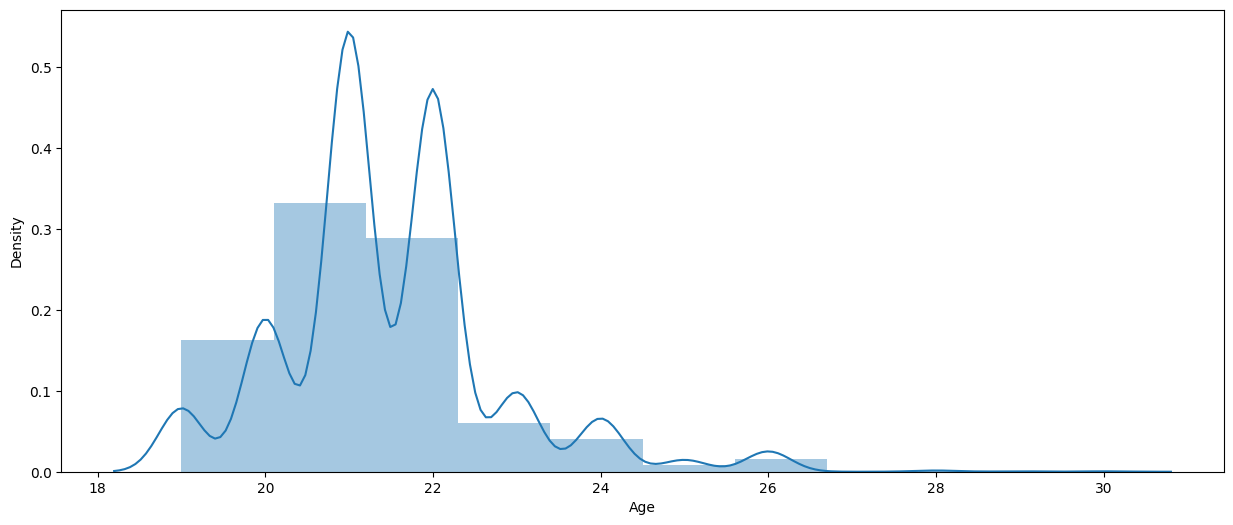

In [29]:
plt.figure(figsize=(15,6))
sns.distplot(df['Age'], kde = True, bins = 10)
plt.show()

In [30]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
df['Gender'].value_counts()

,count
Gender,
Male,2475
Female,491


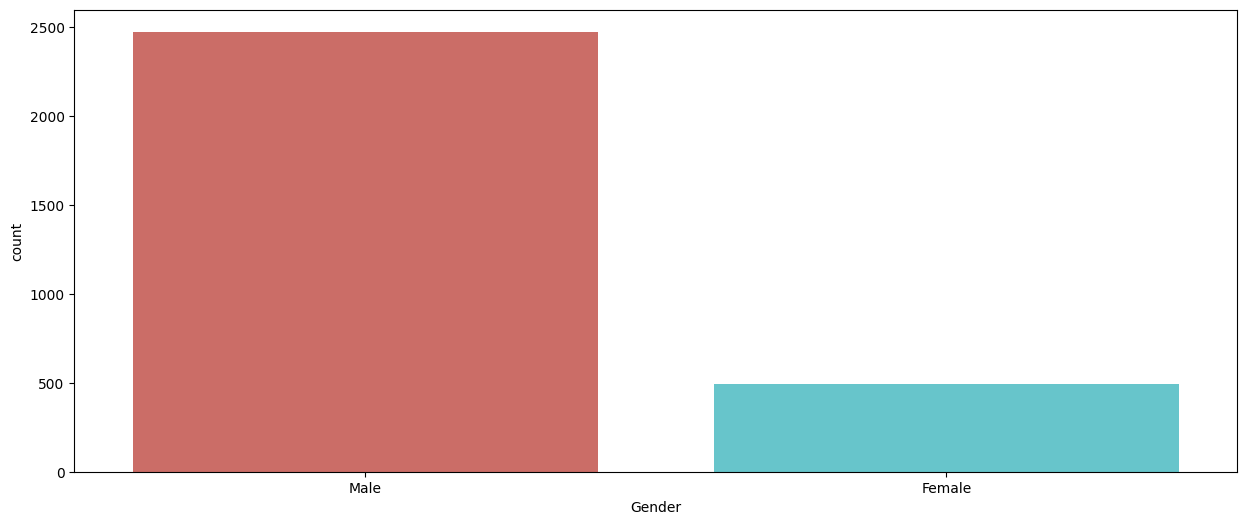

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(x='Gender', data = df, palette = 'hls')
plt.show()

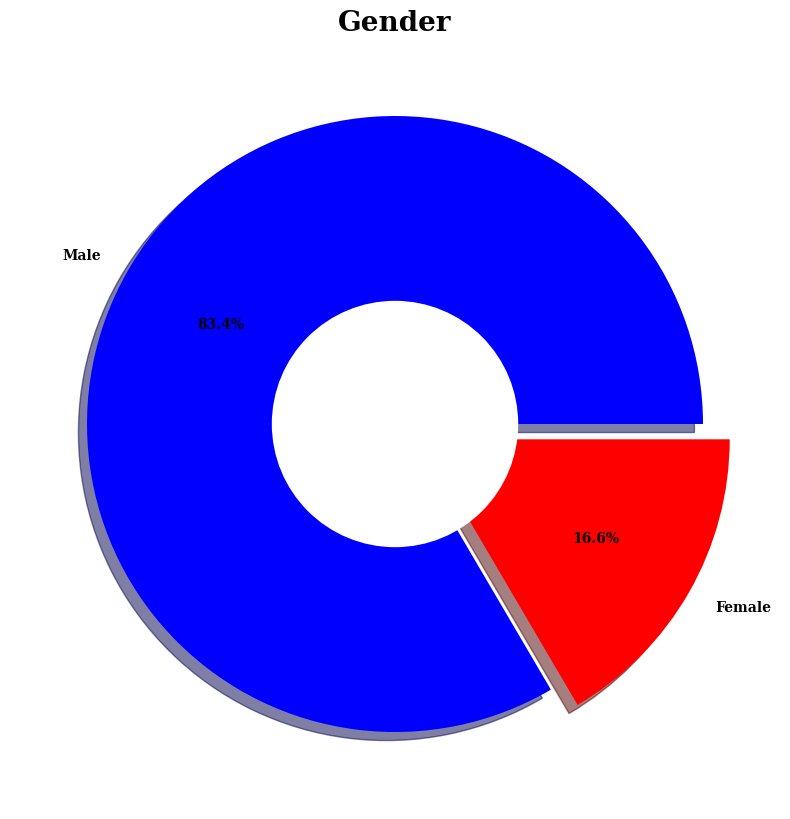

In [33]:
label_data = df['Gender'].value_counts()

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Gender', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [34]:
df.Stream.unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [35]:
df.Stream.value_counts()

,count
Stream,
Computer Science,776
Information Technology,691
Electronics And Communication,424
Mechanical,424
Electrical,334
Civil,317


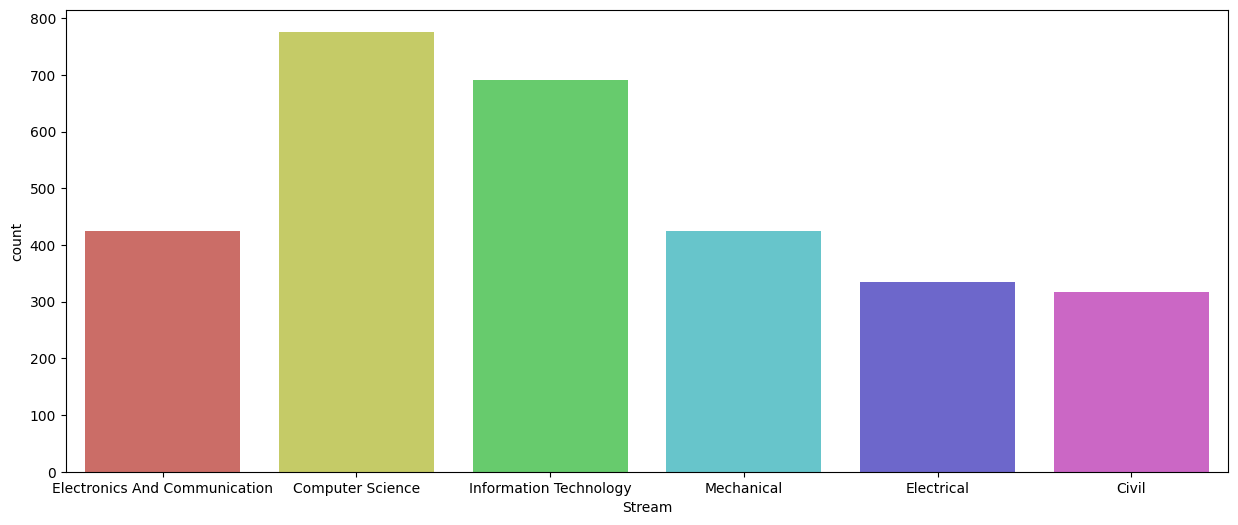

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x='Stream', data = df, palette = 'hls')
plt.show()

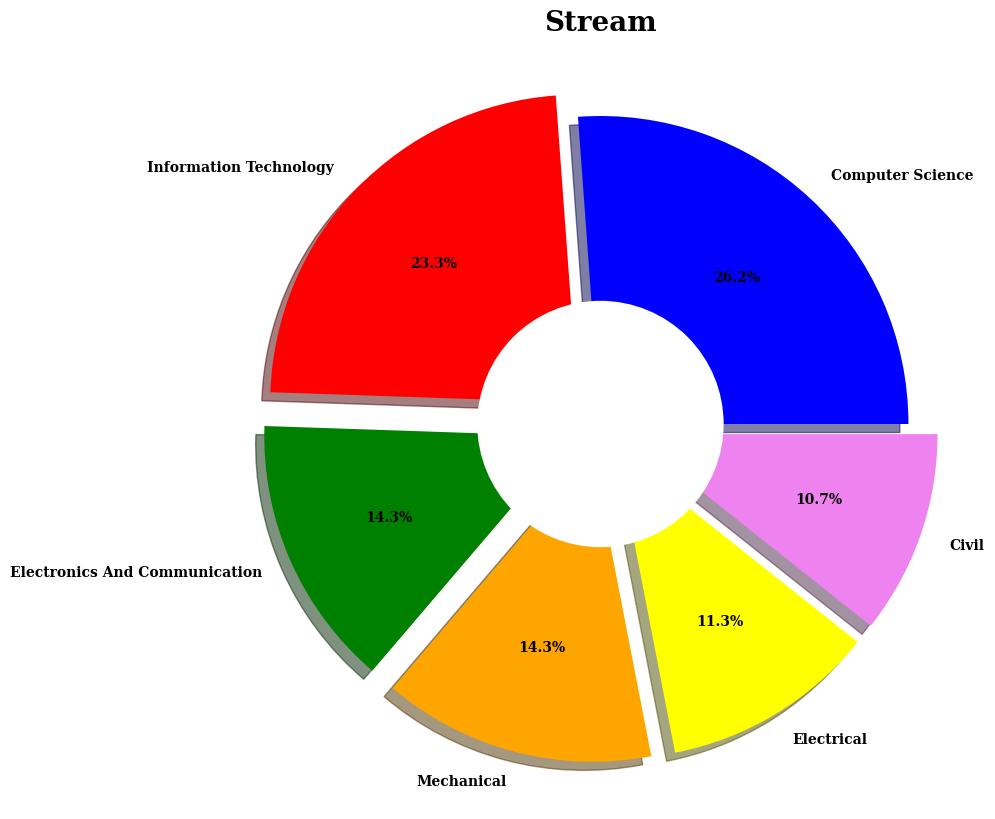

In [37]:
label_data = df['Stream'].value_counts()

explode = (0.0, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green', 'orange', 'yellow', 'violet'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Stream', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

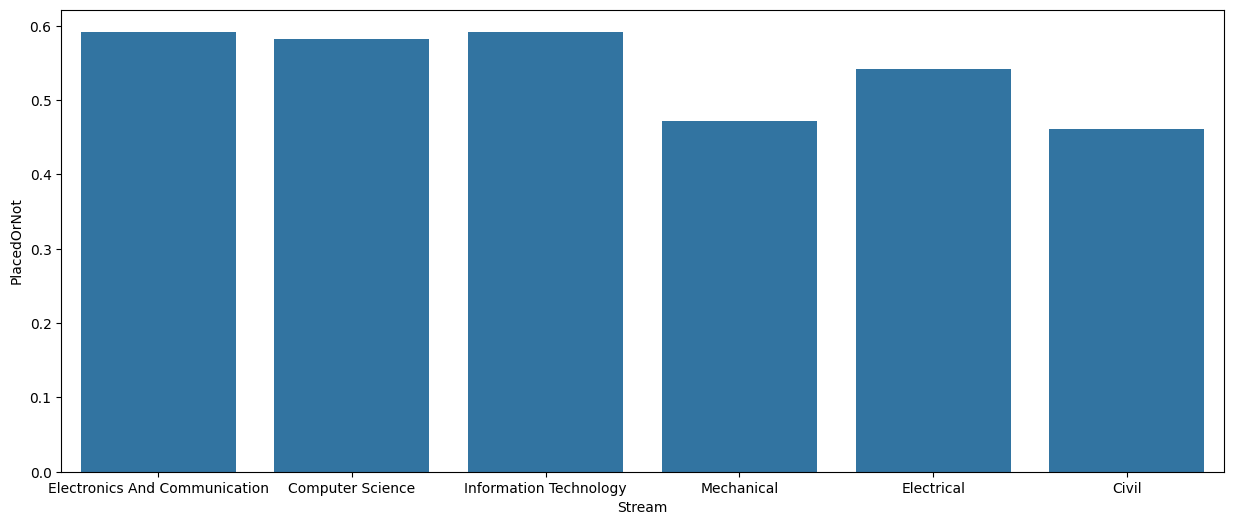

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Stream, y = df.PlacedOrNot,ci=None)
plt.show()

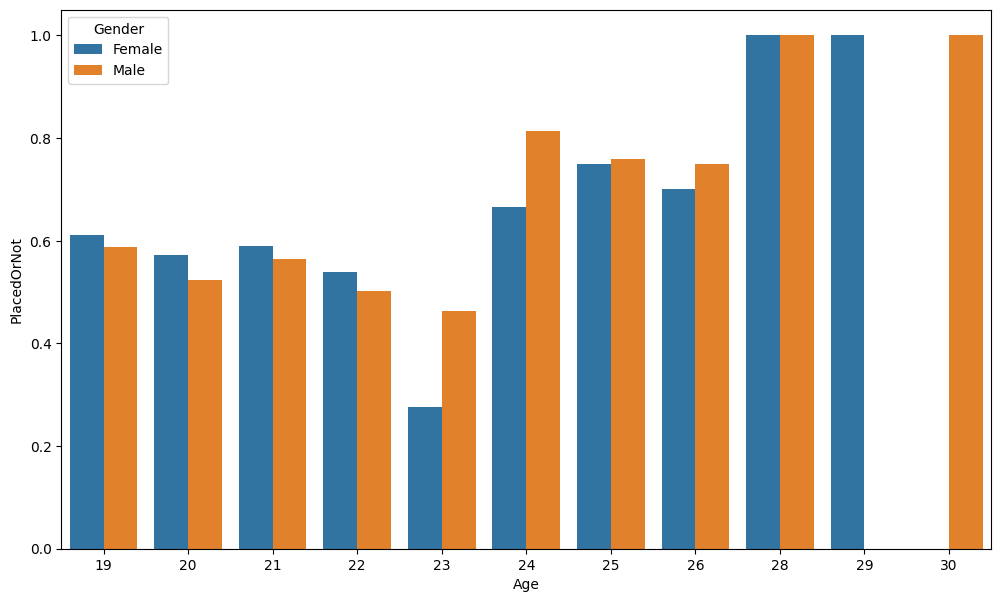

In [39]:
plt.figure(figsize = (12,7))
sns.barplot(x = df.Age, y = df.PlacedOrNot, hue = df.Gender,ci=None)
plt.show()

In [40]:
df['Internships'].unique()

array([1, 0, 2, 3])

In [41]:
df['Internships'].value_counts()

,count
Internships,
0,1331
1,1234
2,350
3,51


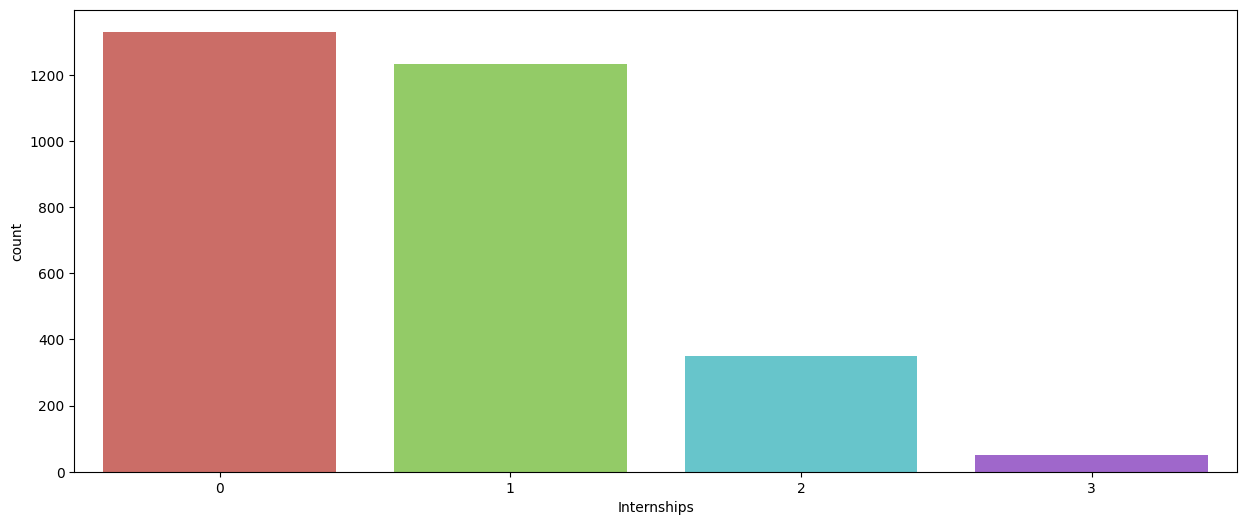

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(x='Internships', data = df, palette = 'hls')
plt.show()

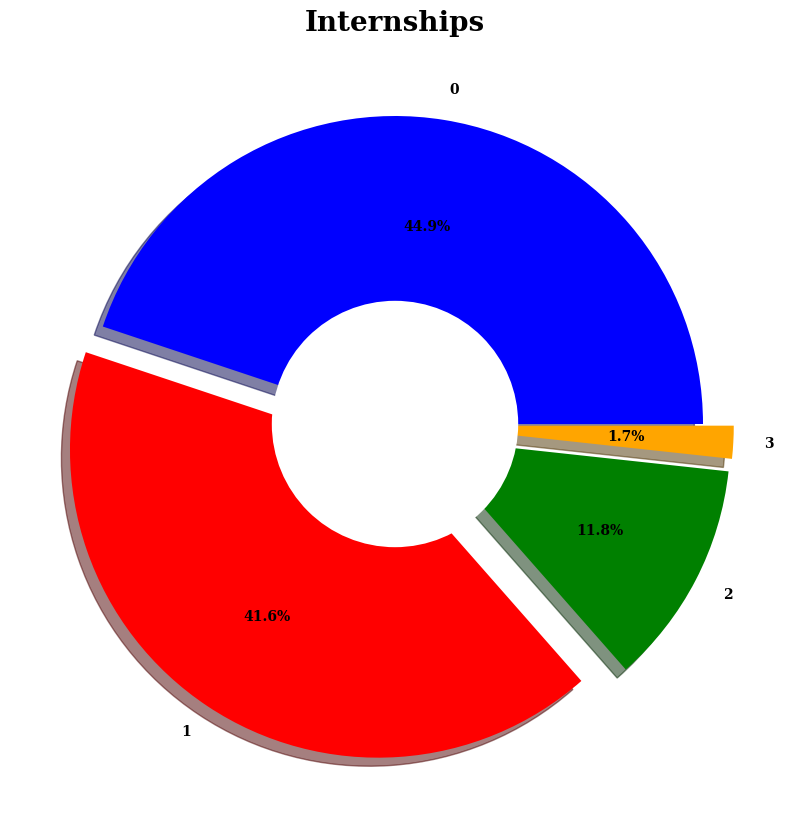

In [43]:
label_data = df['Internships'].value_counts()

explode = (0.0, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green', 'orange'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Internships', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [44]:
df['CGPA'].unique()

array([8, 7, 6, 9, 5])

In [45]:
df['CGPA'].value_counts()

,count
CGPA,
7,956
8,915
6,834
9,165
5,96


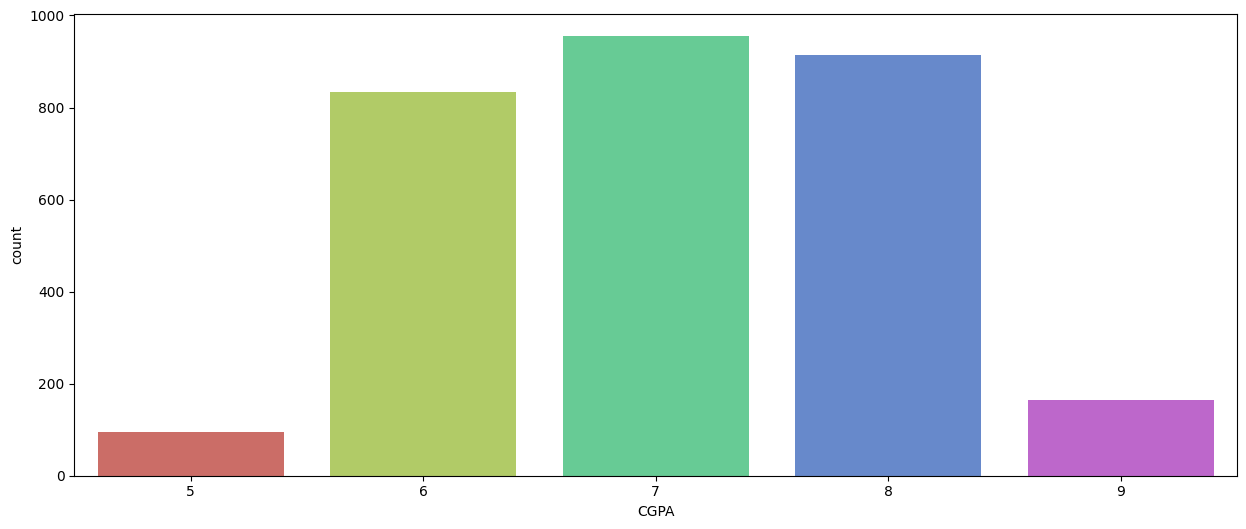

In [46]:
plt.figure(figsize=(15,6))
sns.countplot(x='CGPA', data = df, palette = 'hls')
plt.show()

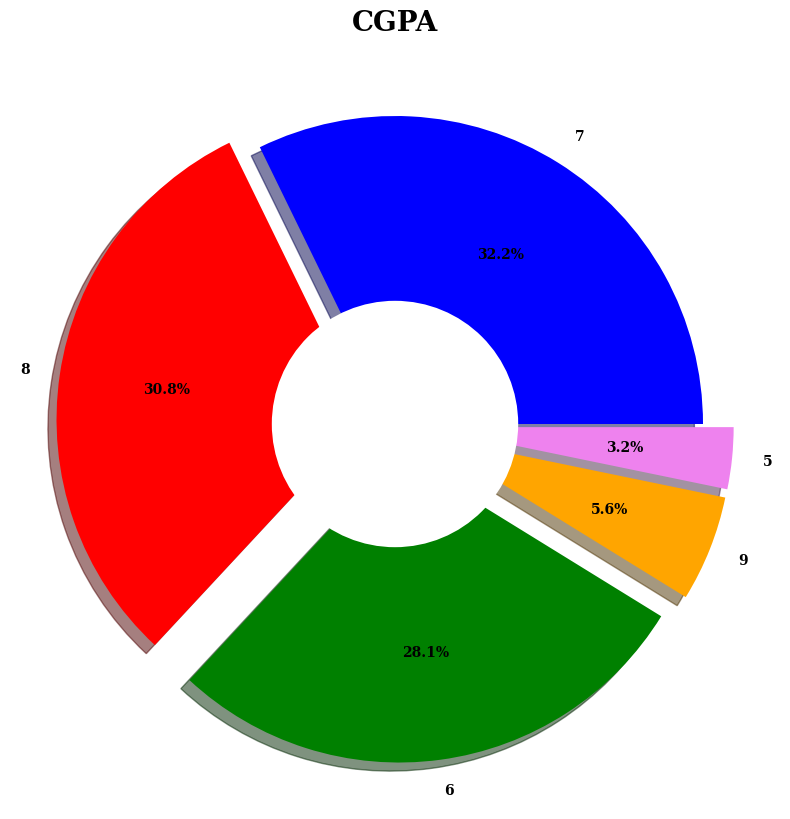

In [47]:
label_data = df['CGPA'].value_counts()

explode = (0.0, 0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red', 'green', 'orange', 'violet'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('CGPA', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [48]:
df['Hostel'].unique()

array([1, 0])

In [49]:
df['Hostel'].value_counts()

,count
Hostel,
0,2168
1,798


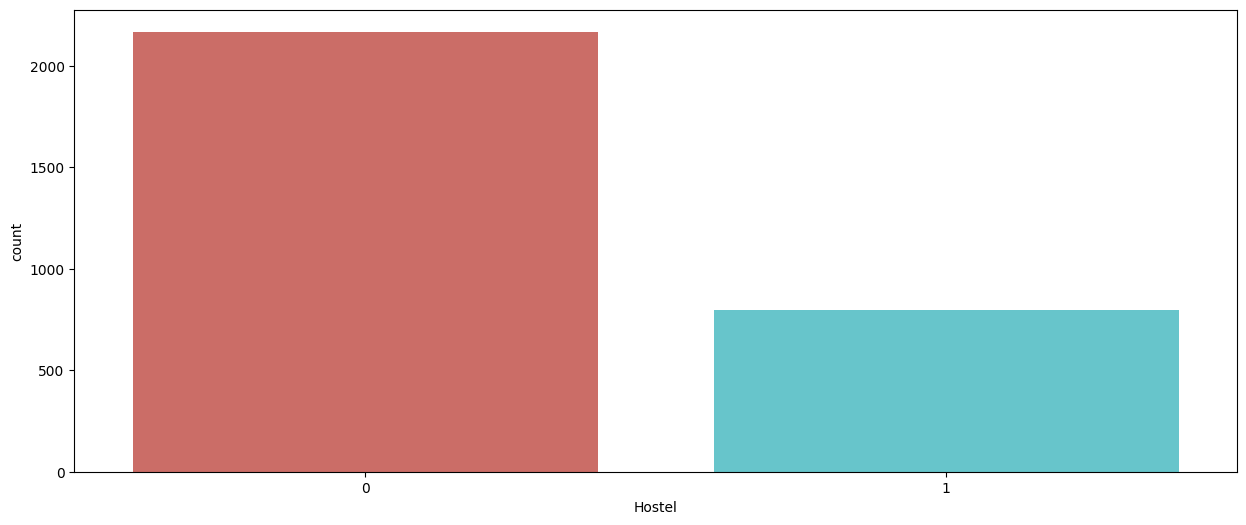

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(x='Hostel', data = df, palette = 'hls')
plt.show()

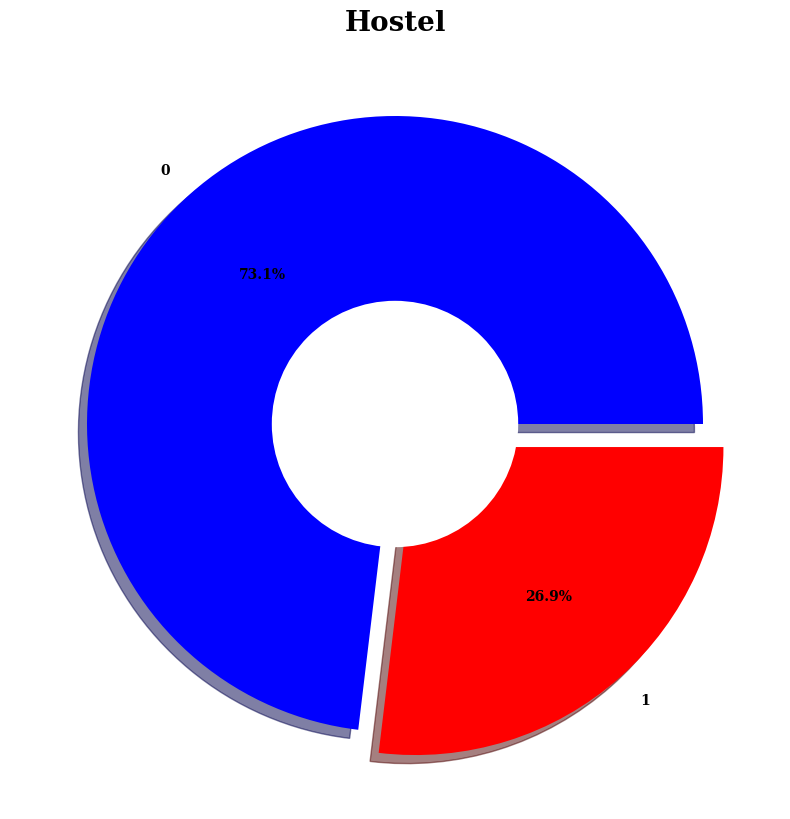

In [51]:
label_data = df['Hostel'].value_counts()

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Hostel', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [52]:
df['HistoryOfBacklogs'].unique()

array([1, 0])

In [53]:
df['HistoryOfBacklogs'].value_counts()

,count
HistoryOfBacklogs,
0,2396
1,570


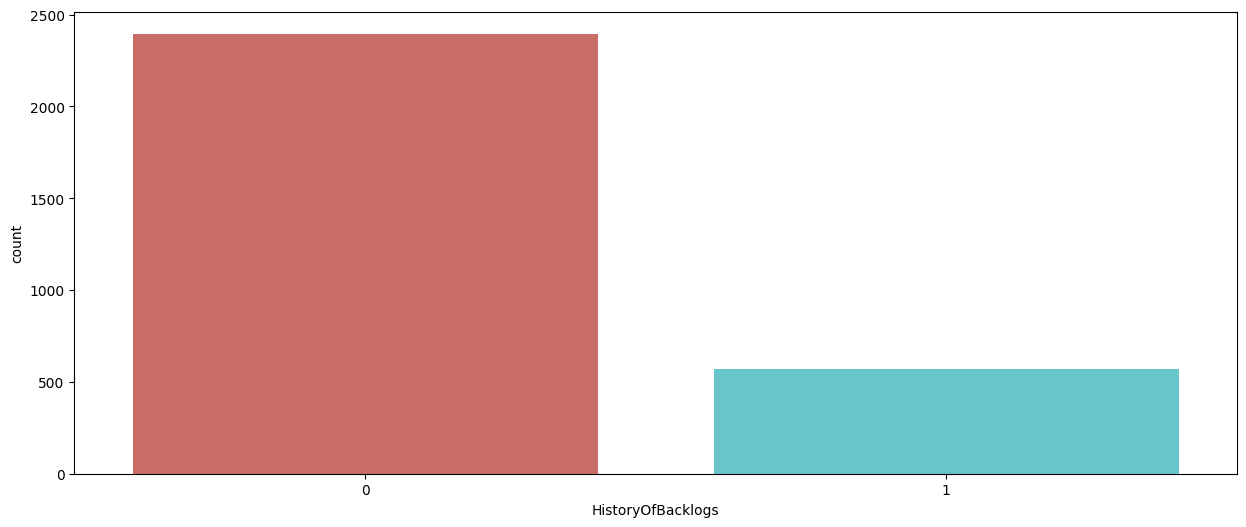

In [54]:
plt.figure(figsize=(15,6))
sns.countplot(x='HistoryOfBacklogs', data = df, palette = 'hls')
plt.show()

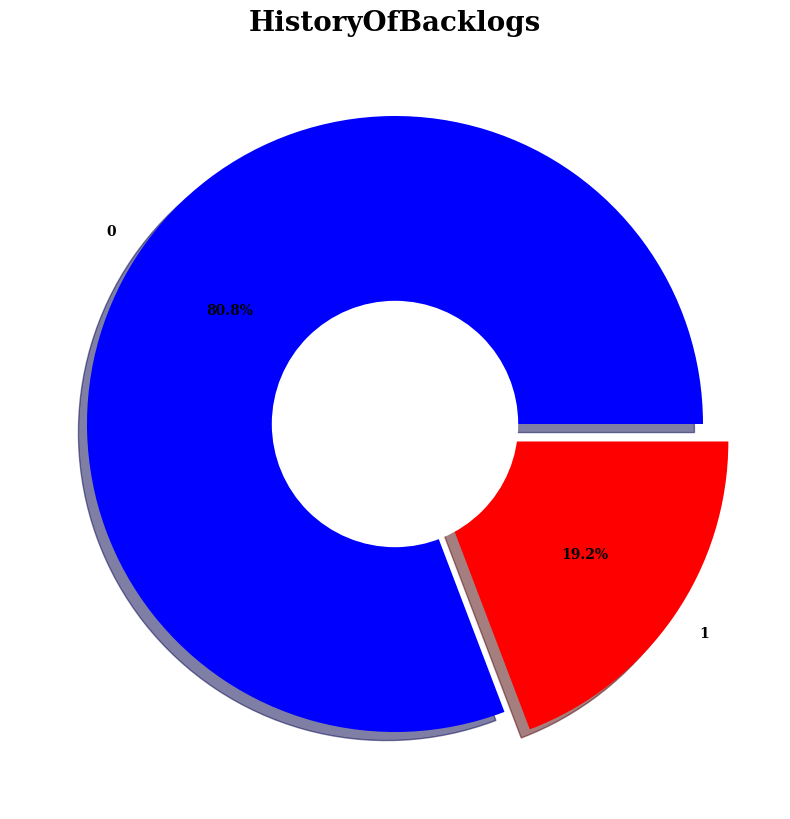

In [55]:
label_data = df['HistoryOfBacklogs'].value_counts()

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('HistoryOfBacklogs', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [56]:
df['PlacedOrNot'].unique()

array([1, 0])

In [57]:
df['PlacedOrNot'].value_counts()

,count
PlacedOrNot,
1,1639
0,1327


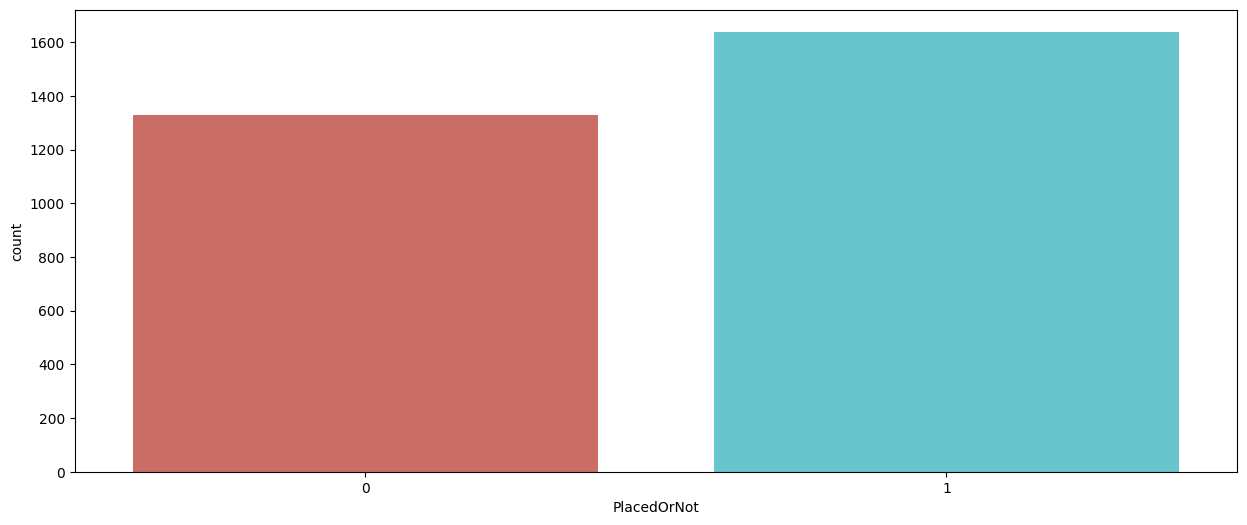

In [58]:
plt.figure(figsize=(15,6))
sns.countplot(x='PlacedOrNot', data = df, palette = 'hls')
plt.show()

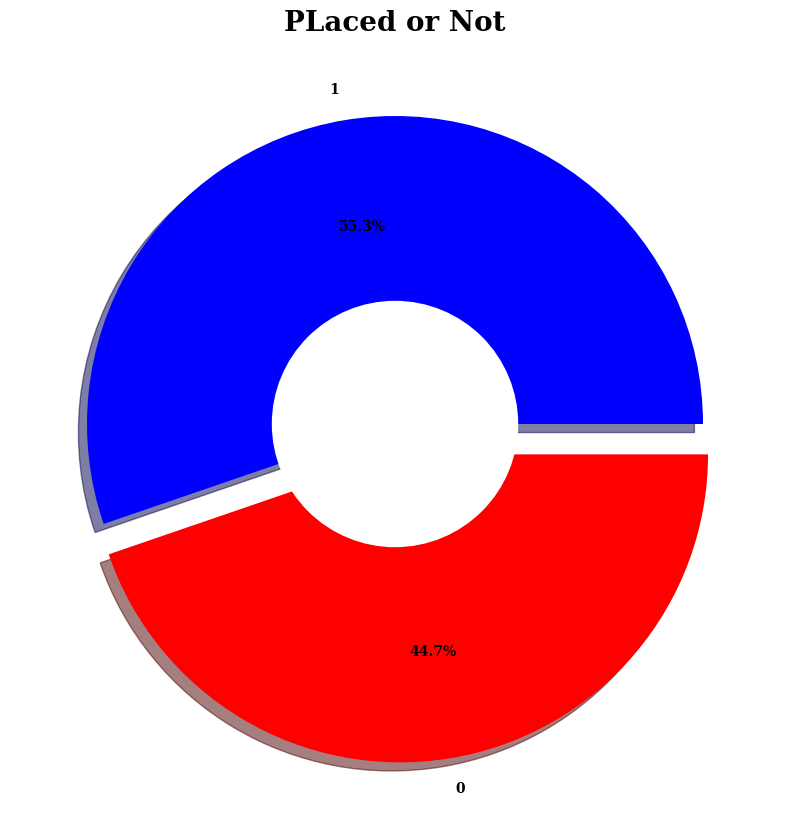

In [59]:
label_data = df['PlacedOrNot'].value_counts()

explode = (0.0, 0.1)
plt.figure(figsize=(20, 10))
patches, texts, pcts = plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               pctdistance = 0.65,
                               shadow = True,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 10,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.setp(pcts, color='black')

hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('PLaced or Not', size=20, **hfont)

centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

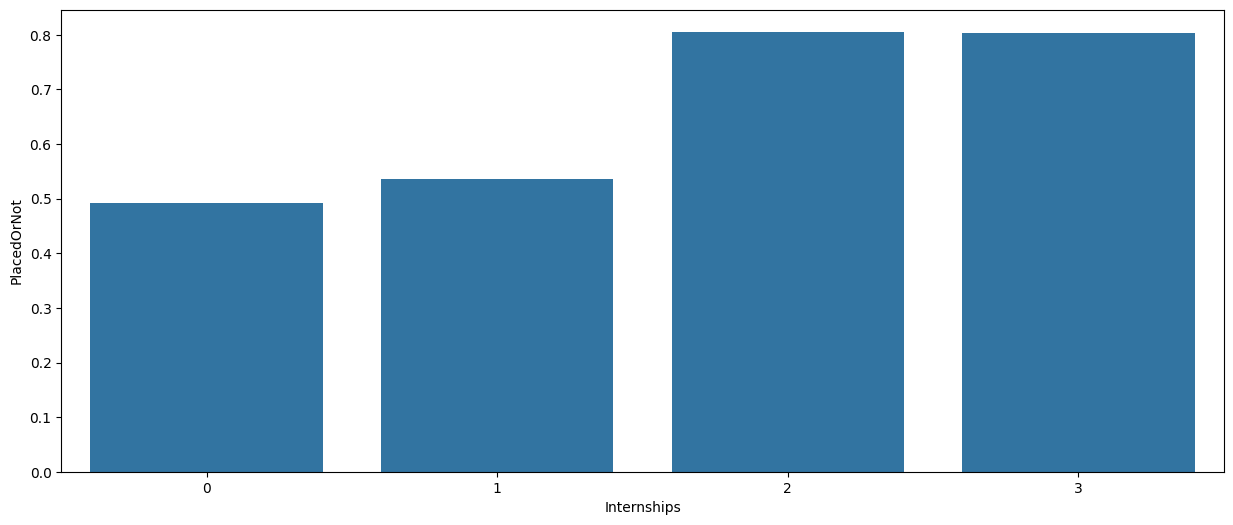

In [60]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Internships, y = df.PlacedOrNot,ci=None)
plt.show()

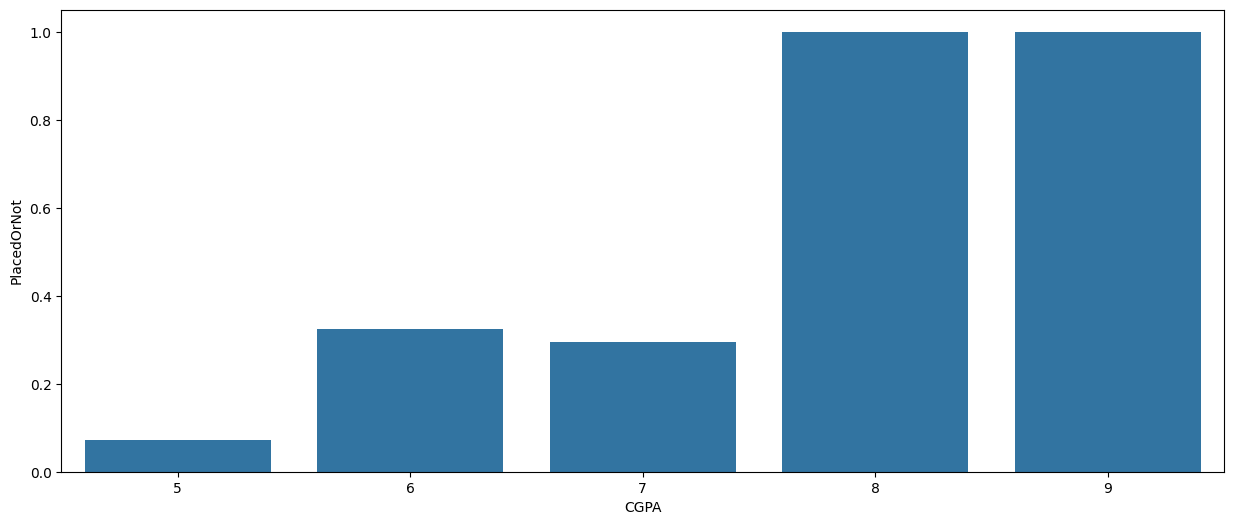

In [61]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.CGPA, y = df.PlacedOrNot,ci=None)
plt.show()

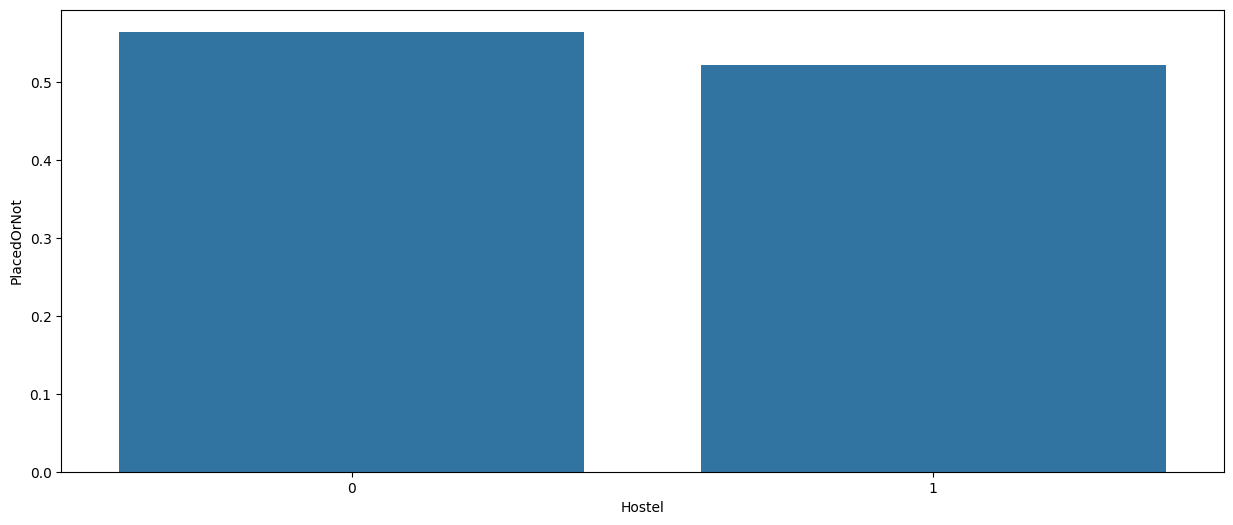

In [62]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Hostel, y = df.PlacedOrNot,ci=None)
plt.show()

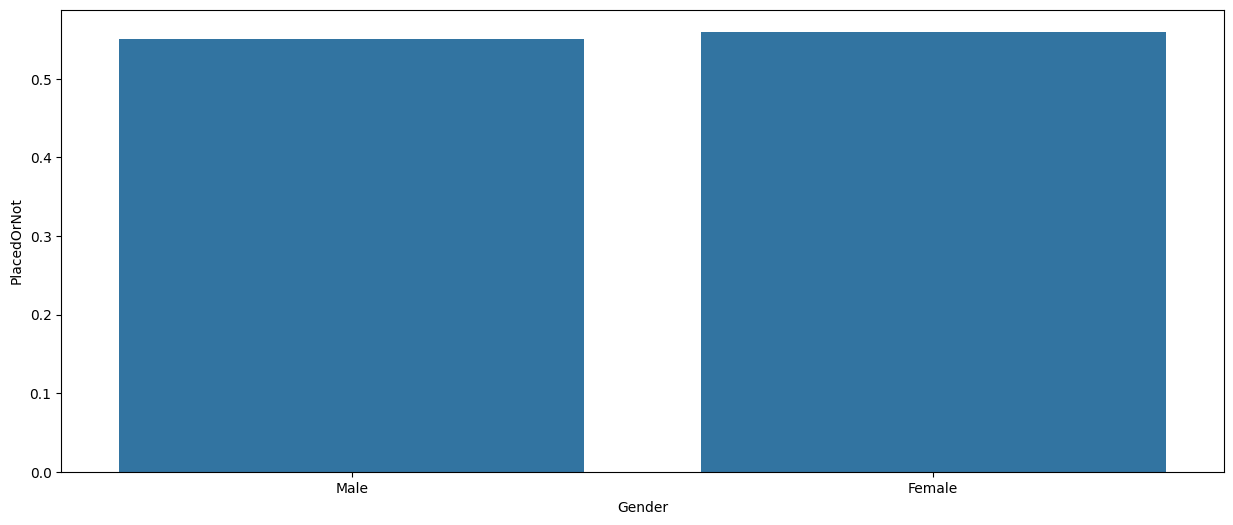

In [63]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.Gender, y = df.PlacedOrNot,ci=None)
plt.show()

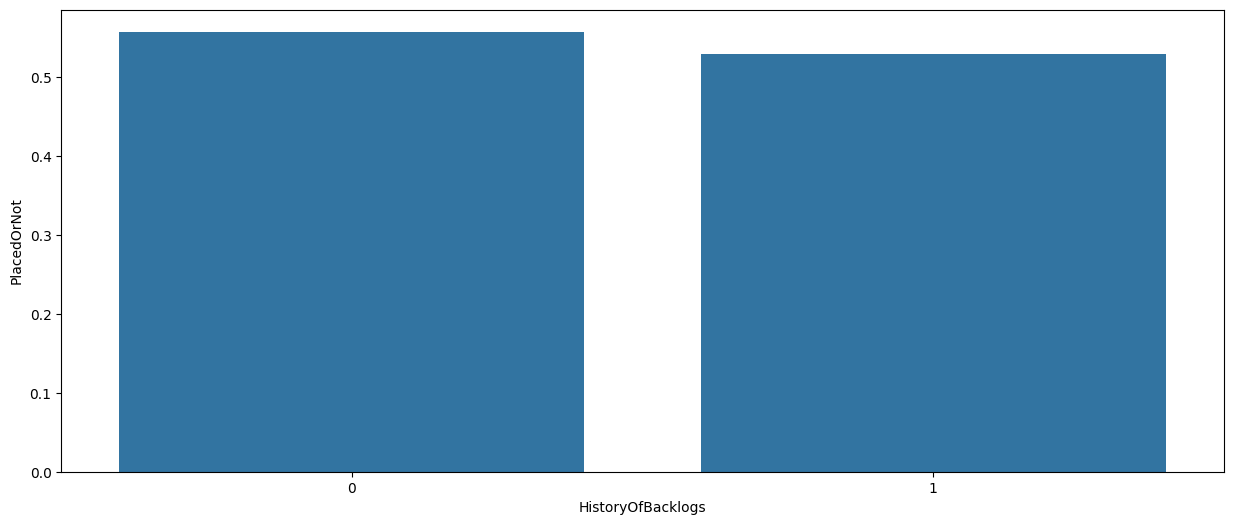

In [64]:
plt.figure(figsize=(15,6))
sns.barplot(x = df.HistoryOfBacklogs, y = df.PlacedOrNot,ci=None)
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [66]:
df.Gender = le.fit_transform(df.Gender)
df.Stream = le.fit_transform(df.Stream)

In [67]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,3,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,4,1,6,0,0,1
3,21,1,4,0,8,0,1,1
4,22,1,5,0,8,1,0,1


In [68]:
x = df.drop(['PlacedOrNot'], axis = 1)

In [69]:
y = df.PlacedOrNot

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [71]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(x)

In [72]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(SVC(),x, y, cv = 3)

array([0.80384226, 0.82305359, 0.90384615])

In [75]:
cross_val_score(DecisionTreeClassifier(), x, y, cv = 3)

array([0.84428716, 0.84226491, 0.91396761])

In [76]:
cross_val_score(LogisticRegression(), x, y, cv = 3)

array([0.71587462, 0.74418605, 0.83097166])

In [77]:
cross_val_score(RandomForestClassifier(n_estimators=50), x, y, cv = 3)

array([0.8463094 , 0.85338726, 0.89777328])

In [78]:
cross_val_score(KNeighborsClassifier(),x, y ,cv = 3)

array([0.809909  , 0.8008089 , 0.89473684])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [80]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
y_pred = model.predict(X_test)

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

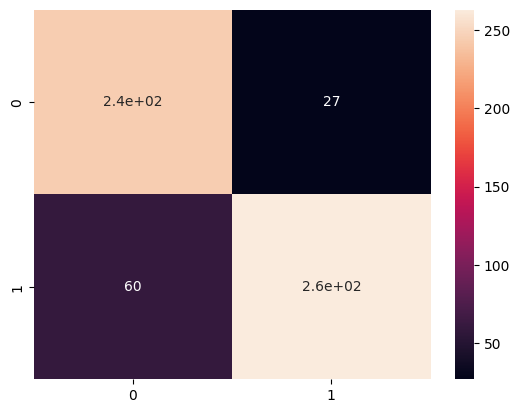

In [83]:
sns.heatmap(cm, annot = True)
plt.show()

In [84]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.9295952782462057
Testing Accuracy : 0.8535353535353535
